# PROJECT NO.3-CAUSE OF DEATH

In this notebook we will examine causes of death dataset, provided by "Flip Robo Technology"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


%matplotlib inline
sns.set_style("darkgrid")
     

The dataset consists of 34 different cause of death counts by country per year. It covers the years from 1990 to 2019

In [2]:
#Read and Load The Given Dataset
df = pd.read_csv("cause_of_deaths dataset.csv")
df.head(10)
     

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,4035,71,151,5628,50158,34030,23722,91,1032,381,9566,46,13106,5525,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,4203,78,159,5821,51125,34787,24104,93,1070,70,9682,49,13335,3255,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,4351,84,168,5949,52039,35565,24368,96,1104,175,10656,50,13572,6723,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,4397,89,173,5930,52720,34943,24010,97,1114,7123,11155,51,13695,12073,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,4327,93,178,5887,53413,33713,23386,98,1120,70,11313,51,13811,5104,2437,4150,502,3068,6603,7400,3247,6182,470,4332


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [4]:
df[df["Malaria"].isnull()].sum()

Country/Territory                             0.0
Code                                          0.0
Year                                          0.0
Meningitis                                    0.0
Alzheimer's Disease and Other Dementias       0.0
Parkinson's Disease                           0.0
Nutritional Deficiencies                      0.0
Malaria                                       0.0
Drowning                                      0.0
Interpersonal Violence                        0.0
Maternal Disorders                            0.0
HIV/AIDS                                      0.0
Drug Use Disorders                            0.0
Tuberculosis                                  0.0
Cardiovascular Diseases                       0.0
Lower Respiratory Infections                  0.0
Neonatal Disorders                            0.0
Alcohol Use Disorders                         0.0
Self-harm                                     0.0
Exposure to Forces of Nature                  0.0


In [5]:
df.columns = [i.split("(")[0].strip() for i in df.columns]

In [6]:
df.iloc[:,2:] = df.iloc[:,2:].replace({np.nan: 0})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [8]:
df.iloc[:,4:] = df.iloc[:,4:].astype(int)
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


# Exploratory Data Analysis
Top 10 causes of death for Turkey in 2019 (latest available year)

Text(0.5, 0, 'Total # of Meningitis')

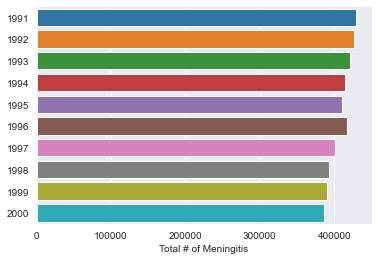

In [11]:
country_execution = df.groupby("Year").sum()["Meningitis"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Meningitis")
     

Text(0.5, 0, 'Total Deaths 1990-2019')

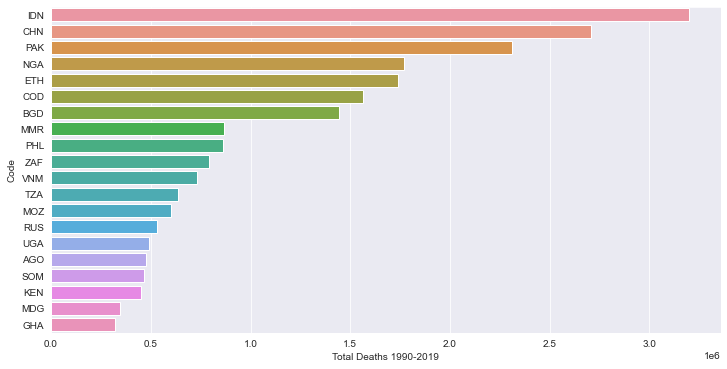

In [13]:
country_terrorism = df[df.Code.notnull()].groupby("Code").sum()["Tuberculosis"].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_terrorism[1:21].values,y=country_terrorism[1:21].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0.5, 0, 'Total Deaths 1990-2019')

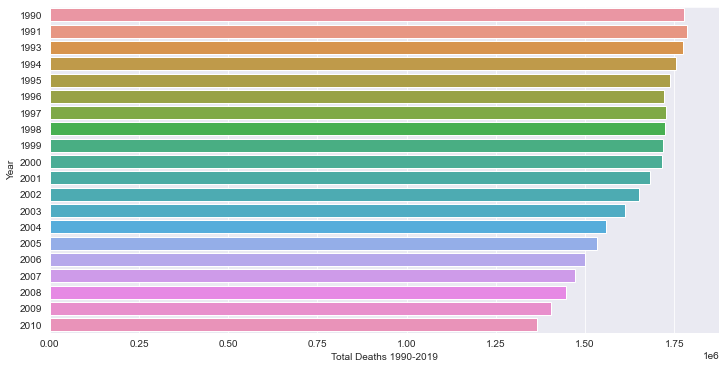

In [14]:
country_terrorism = df[df.Code.notnull()].groupby("Year").sum()["Tuberculosis"].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_terrorism[1:21].values,y=country_terrorism[1:21].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

# Deadliest Year
Deadliest year appears to be 2019 in terms of death counts, however this was due to the increase of the world population each year. 
We need to check death rate per year.

Text(0, 0.5, '# of Deaths')

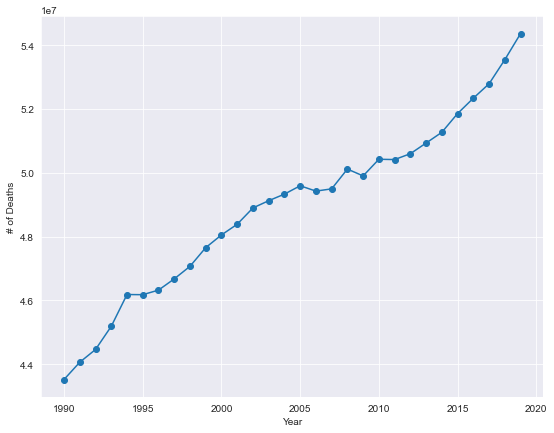

In [15]:
df["total_death"] = df.iloc[:,3:].sum(axis=1)
death_by_year = df.groupby("Year").sum()["total_death"]

fig = plt.figure(figsize=(9,7))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

In [16]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'total_death'],
      dtype='object')

<AxesSubplot:xlabel='Road Injuries', ylabel='Density'>

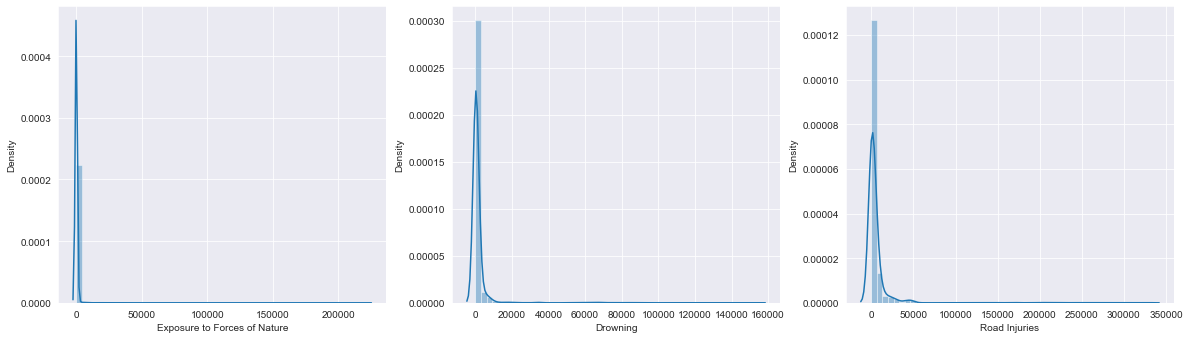

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['Exposure to Forces of Nature'])

plt.subplot(2,3,2)
sns.distplot(df['Drowning'])

plt.subplot(2,3,3)
sns.distplot(df['Road Injuries'])

<AxesSubplot:xlabel='Cirrhosis and Other Chronic Liver Diseases', ylabel='Density'>

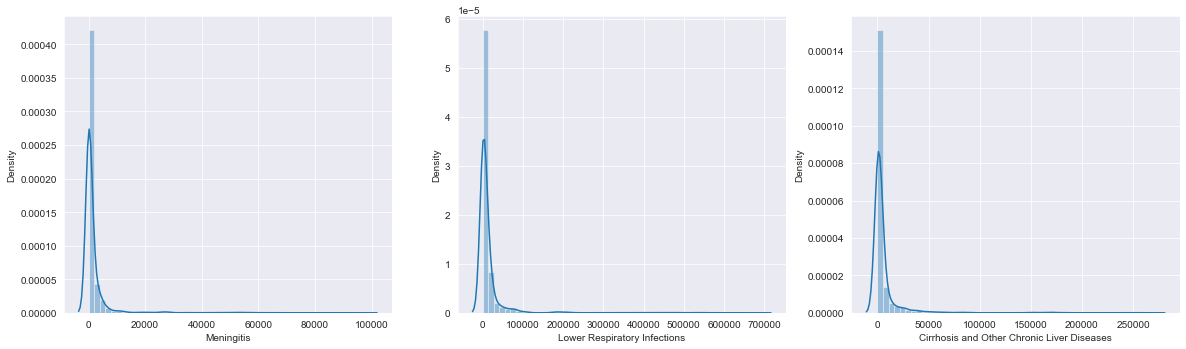

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['Meningitis'])
plt.subplot(2,3,2)
sns.distplot(df['Lower Respiratory Infections'])
plt.subplot(2,3,3)
sns.distplot(df['Cirrhosis and Other Chronic Liver Diseases'])

<AxesSubplot:>

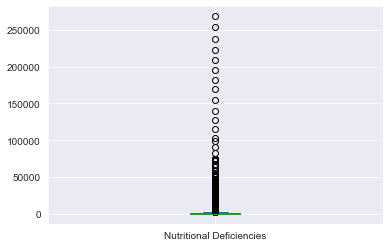

In [19]:
#univariate analysis
df['Nutritional Deficiencies'].plot.box()

<AxesSubplot:>

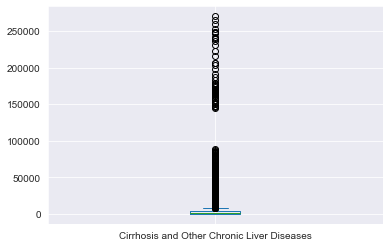

In [20]:
#univariate analysis
df['Cirrhosis and Other Chronic Liver Diseases'].plot.box()

In [21]:
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,total_death
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,434.006699,7491.928595,7.316045e+04,13687.914706,12558.942647,787.421242,3874.825327,243.485621,1.082280e+04,292.295915,3.754224e+04,538.243954,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902,2.398913e+05
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,2898.761628,39549.977578,2.915775e+05,48031.720009,56058.366412,3545.823616,18425.616418,4717.104377,6.541617e+04,1704.466356,1.615584e+05,7033.308187,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497,8.737139e+05
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,7.000000e+00
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,3.000000,35.000000,2.028000e+03,345.000000,131.000000,9.000000,94.000000,0.000000,2.000000e+01,2.000000,8.097500e+02,0.000000,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000,6.935000e+03
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,20.000000,417.000000,1.174200e+04,2126.500000,916.000000,80.000000,533.000000,0.000000,2.965000e+02,21.000000,5.629500e+03,0.000000,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000,5.025750e+04
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,129.000000,2924.250000,4.254650e+04,10161.250000,7419.750000,316.000000,1882.250000,12.000000,3.946750e+03,109.000000,2.014775e+04,23.000000,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000,1.582210e+05
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,65717.000000,657515.000000,4.584273e+06,690913.000000,852761.000000,55200.000000,220357.000000,222641.000000,1.119477e+06,29048.000000,2.716551e+06,503532.000000,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000,1.044256e+07


In [22]:
df.skew()

Year                                           0.000000
Meningitis                                     8.248599
Alzheimer's Disease and Other Dementias        8.695288
Parkinson's Disease                            9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8.973653
Exposure to Forces of Nature                  34

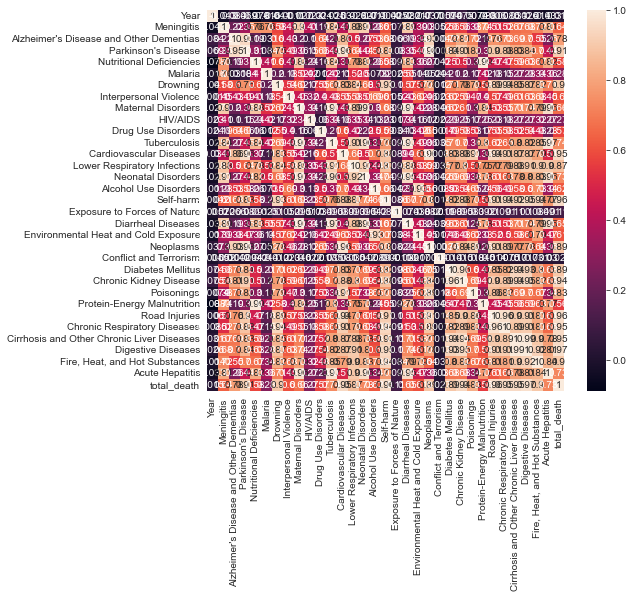

In [23]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [24]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Year', 'Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'total_death'],
      dtype='object')

In [25]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

Index(['Country/Territory', 'Code'], dtype='object')

<AxesSubplot:ylabel='Year'>

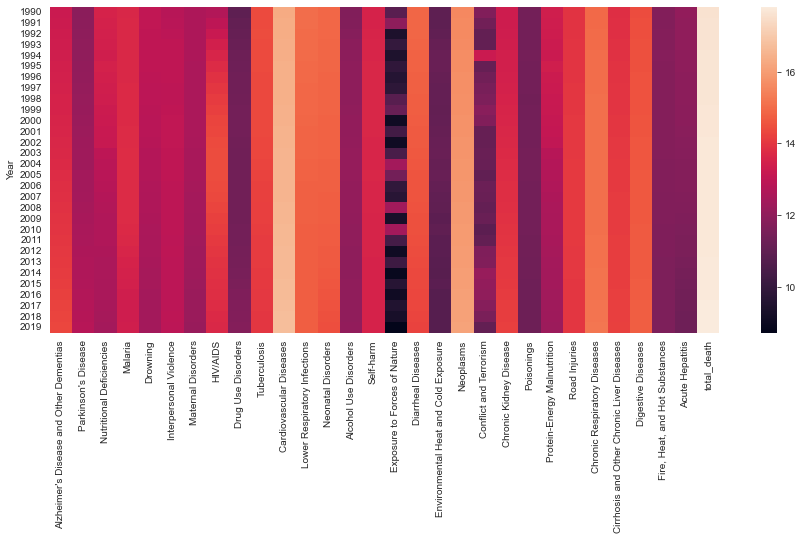

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(np.log(df.drop(["Code","Meningitis","Diabetes Mellitus"],axis=1).groupby("Year").sum()).replace(-np.inf,10))

In [27]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'total_death'],
      dtype='object')

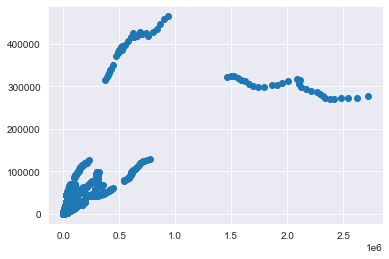

In [28]:
plt.scatter(df['Neoplasms'],df['Digestive Diseases'])
plt.show()

<AxesSubplot:ylabel='Malaria'>

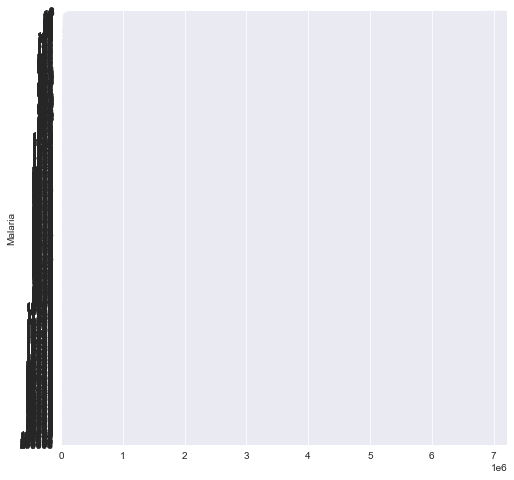

In [30]:
year_conflict = df.groupby("Malaria").sum()["Year"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Year'>

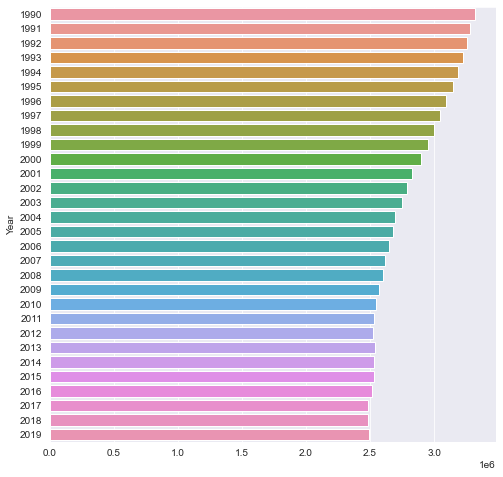

In [31]:
year_conflict = df.groupby("Year").sum()["Lower Respiratory Infections"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Code'>

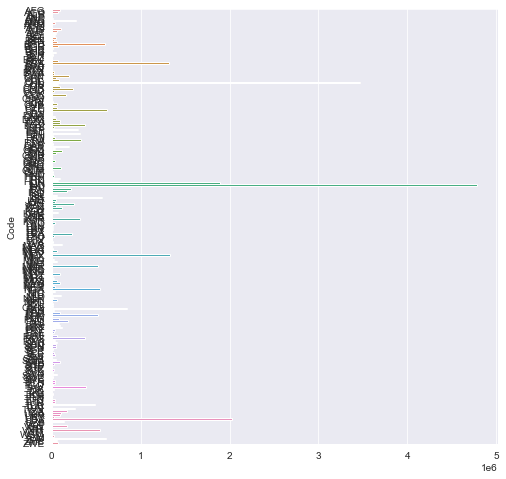

In [32]:
year_conflict = df.groupby("Code").sum()["Diabetes Mellitus"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Self-harm'>

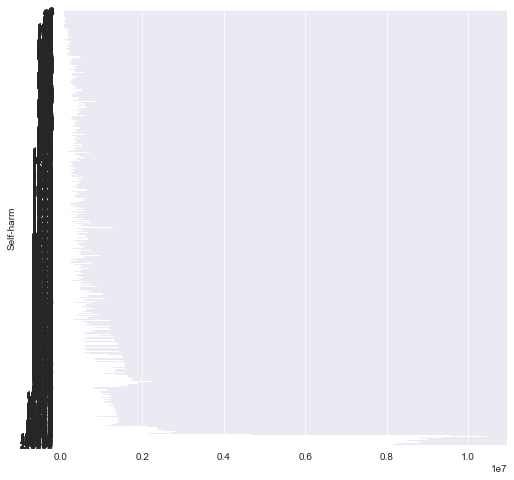

In [33]:
year_conflict = df.groupby("Self-harm").sum()["total_death"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Year'>

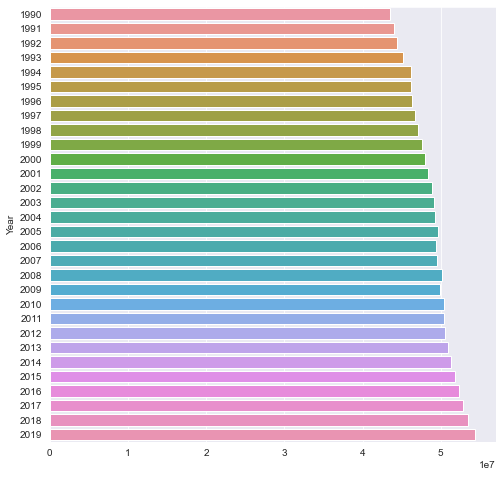

In [34]:
year_conflict = df.groupby("Year").sum()["total_death"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Year'>

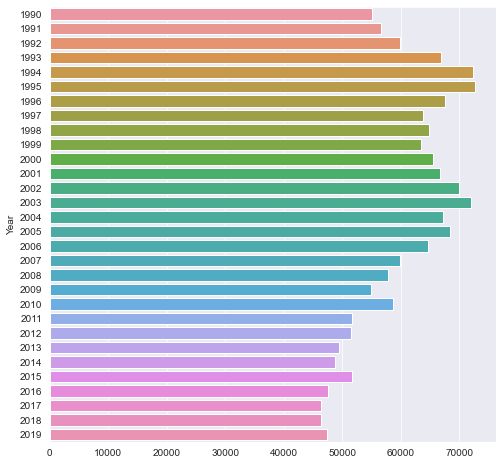

In [35]:
year_conflict = df.groupby("Year").sum()["Environmental Heat and Cold Exposure"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Year'>

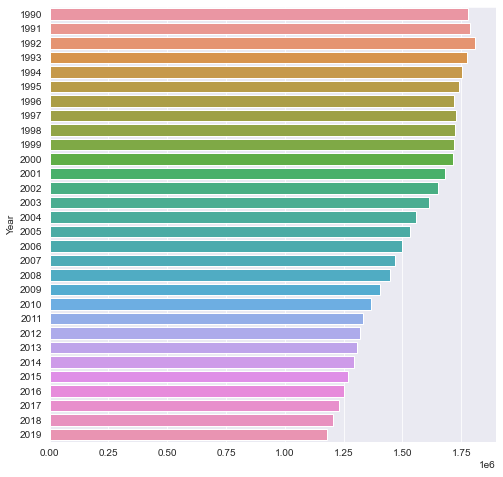

In [36]:
year_conflict = df.groupby("Year").sum()["Tuberculosis"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

Text(0, 0.5, 'Death by Tuberculosis')

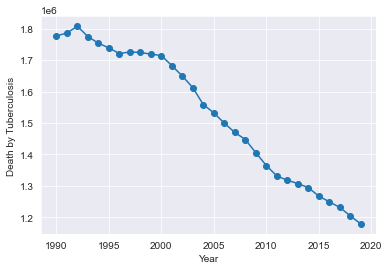

In [37]:
df.groupby("Year").sum()["Tuberculosis"].plot(marker="o")
plt.ylabel("Death by Tuberculosis")

Text(0, 0.5, 'Death by Cirrhosis and Other Chronic Liver Diseases')

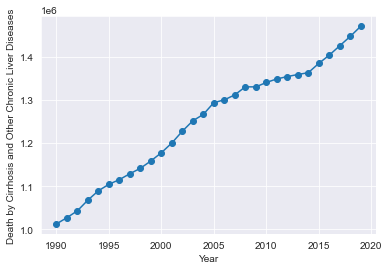

In [38]:
df.groupby("Year").sum()["Cirrhosis and Other Chronic Liver Diseases"].plot(marker="o")
plt.ylabel("Death by Cirrhosis and Other Chronic Liver Diseases")

In [39]:
df.Code = df.Code.dropna().apply(str.lower)
cause_by_country = df.groupby("Year").sum().drop(["Meningitis","Digestive Diseases"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

total_death    30
dtype: int64

In [40]:
df.Year.replace({'>1000':1000, '>1': 1},inplace=True)
df.Year = df.Year.astype(int)

Text(0.5, 0, 'Total # of Meningitis')

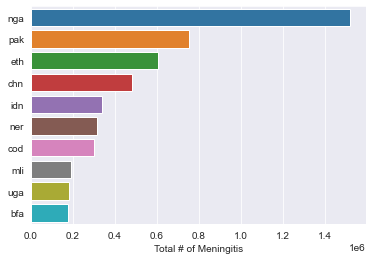

In [41]:
country_execution = df.groupby("Code").sum()["Meningitis"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Meningitis")

Text(0.5, 0, 'Total # of Drowning')

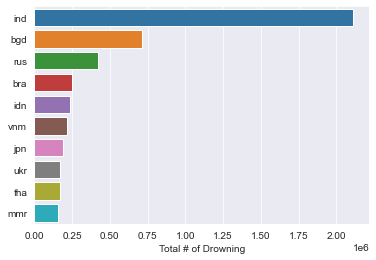

In [42]:
country_execution = df.groupby("Code").sum()["Drowning"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Drowning")

Text(0.5, 0, 'Total # of Meningitis')

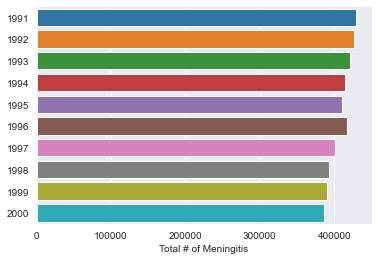

In [43]:
country_execution = df.groupby("Year").sum()["Meningitis"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Meningitis")

Text(0.5, 0, 'Total # of Acute Hepatitis')

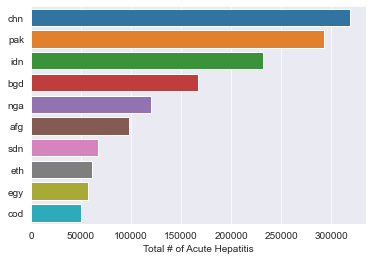

In [44]:
country_execution = df.groupby("Code").sum()["Acute Hepatitis"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of Acute Hepatitis")

Text(0.5, 0, 'Total # of HIV/AIDS')

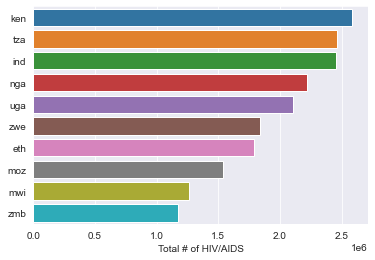

In [45]:
country_execution = df.groupby("Code").sum()["HIV/AIDS"].sort_values(ascending=False)
sns.barplot(x=country_execution.values[1:11],y=country_execution.index[1:11],orient="h")
plt.ylabel("")
plt.xlabel("Total # of HIV/AIDS")

<AxesSubplot:>

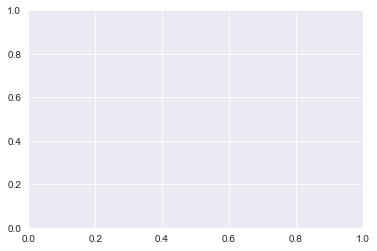

In [46]:
turkey_2017 = df[df.Code == "Turkey"].groupby("Year").sum()["Neonatal Disorders"].sort_values(ascending=False)
sns.histplot(x=turkey_2017.values[:10],y=turkey_2017.index[:10],orient="h")

In [47]:
cause_by_country = pd.DataFrame(list(zip(cause_by_country,cause_by_country.index)),columns=["Common Disease","Country"])
cause_by_country = cause_by_country.groupby("Common Disease").agg(list)

In [48]:
!pip install pygal_maps_world
!pip install pycountry

In [49]:
import pycountry
country_mapping = {country.alpha_3.lower(): country.alpha_2.lower() for country in pycountry.countries}

In [50]:
!pip install CairoSVG
from pygal_maps_world.maps import World
worldmap_chart = World()
worldmap_chart.title = 'Countries by Most Frequent Death Cause'

for cause in cause_by_country.index:
    countries = [country_mapping.get(country) for country in cause_by_country.loc[cause].values[0]]
    worldmap_chart.add(cause, countries)
  
    worldmap_chart.render()
    worldmap_chart

Text(0, 0.5, '# of Deaths')

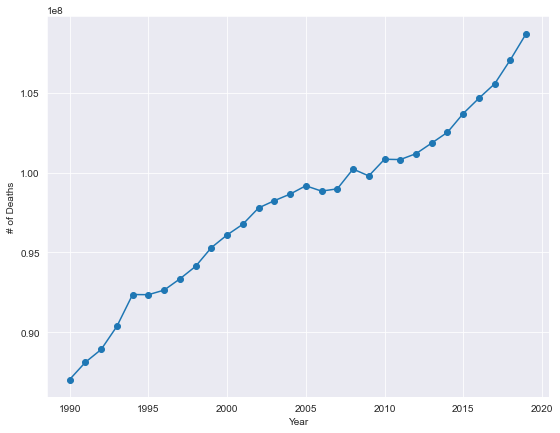

In [51]:
df["total_death"] = df.iloc[:,3:].sum(axis=1)
death_by_year = df.groupby("Year").sum()["total_death"]

fig = plt.figure(figsize=(9,7))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")
     

<AxesSubplot:ylabel='Year'>

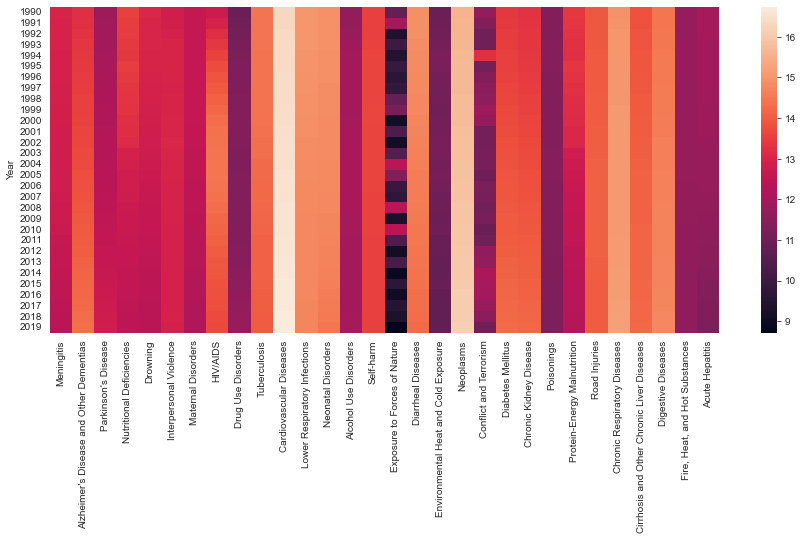

In [52]:
plt.figure(figsize=(15,6))
sns.heatmap(np.log(df.drop(["Code","Malaria","total_death"],axis=1).groupby("Year").sum()).replace(-np.inf,10))
     

<AxesSubplot:ylabel='Year'>

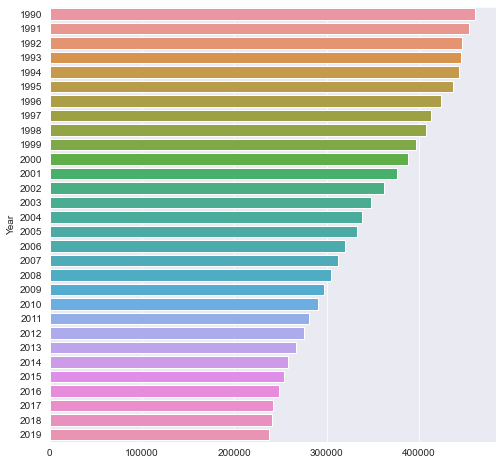

In [53]:
year_conflict = df.groupby("Year").sum()["Drowning"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

<AxesSubplot:ylabel='Year'>

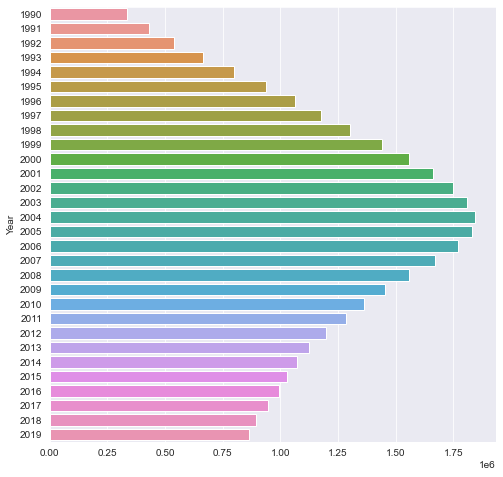

In [54]:
year_conflict = df.groupby("Year").sum()["HIV/AIDS"]
plt.figure(figsize=(8,8))
sns.barplot(y=year_conflict.index,x=year_conflict.values,orient="h")

Text(0, 0.5, 'Death by Drowning')

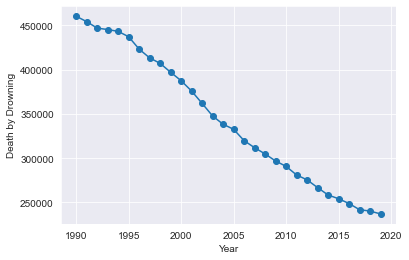

In [55]:
df.groupby("Year").sum()["Drowning"].plot(marker="o")
plt.ylabel("Death by Drowning")
     

# Which country suffers from what disease the most?

In [56]:
df.Code = df.Code.dropna().apply(str.lower)
cause_by_country = df.groupby("Code").sum().drop(["Year","total_death"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

Cardiovascular Diseases         156
HIV/AIDS                         17
Neoplasms                        10
Diarrheal Diseases                7
Malaria                           5
Neonatal Disorders                4
Lower Respiratory Infections      4
Conflict and Terrorism            1
dtype: int64

In [57]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'total_death'],
      dtype='object')

In [58]:
world_population = range(1990,2019)
yearly_counts = df.groupby("Year").sum()


ValueError: num must be 1 <= num <= 20, not 21

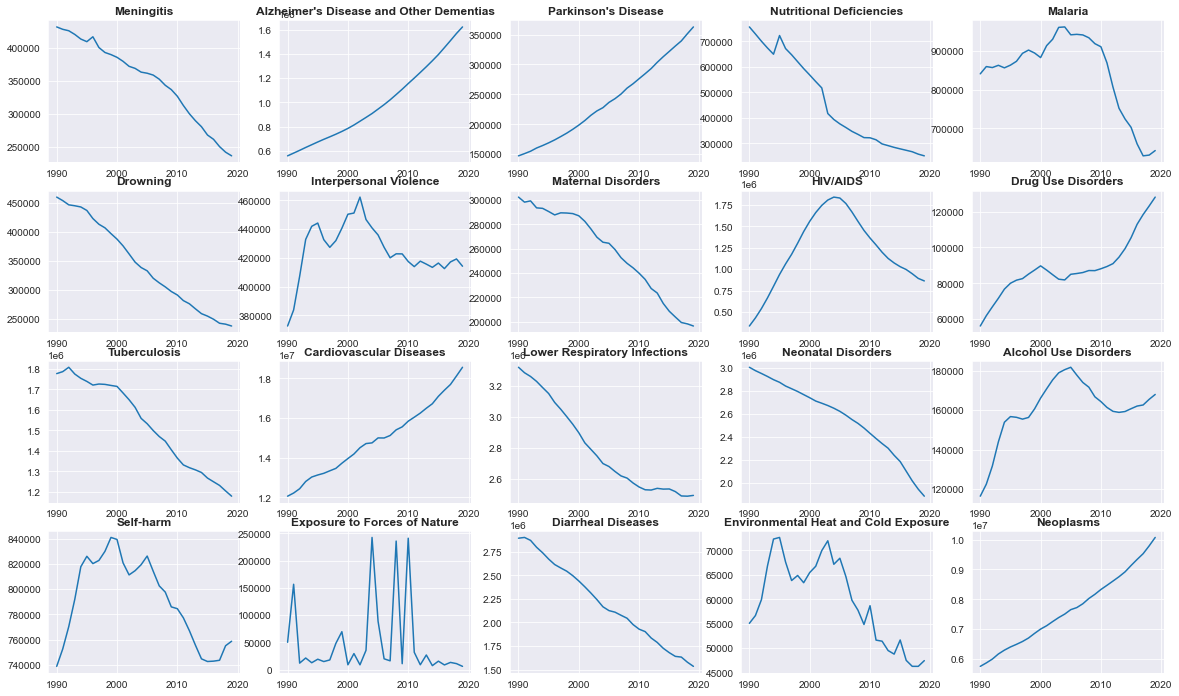

In [59]:
plt.figure(figsize=(20,12))
for i,cause in enumerate(yearly_counts[['Meningitis',"Alzheimer's Disease and Other Dementias", "Parkinson's Disease",'Nutritional Deficiencies', 'Malaria', 'Drowning','Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS','Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases','Lower Respiratory Infections', 'Neonatal Disorders','Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature','Diarrheal Diseases', 'Environmental Heat and Cold Exposure','Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus','Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition','Road Injuries', 'Chronic Respiratory Diseases','Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases','Fire, Heat, and Hot Substances', 'Acute Hepatitis'
                                       ]]):
    
    plt.subplot(4,5,i+1)
    sns.lineplot(x=yearly_counts.index,y=yearly_counts[cause])
    plt.title(cause,fontweight="bold")
    plt.ylabel("")
    plt.xlabel("")

plt.tight_layout()
 
     

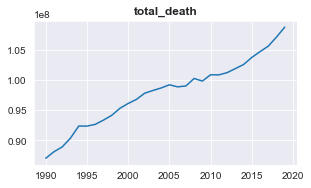

In [60]:
plt.figure(figsize=(20,12))
for i,cause in enumerate(yearly_counts.drop(['Meningitis',"Alzheimer's Disease and Other Dementias", "Parkinson's Disease",'Nutritional Deficiencies', 'Malaria', 'Drowning','Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS','Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases','Lower Respiratory Infections', 'Neonatal Disorders','Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature','Diarrheal Diseases', 'Environmental Heat and Cold Exposure','Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus','Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition','Road Injuries', 'Chronic Respiratory Diseases','Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases','Fire, Heat, and Hot Substances', 'Acute Hepatitis'
                                            ],axis=1)):
     
        plt.subplot(5,5,i+1)
        sns.lineplot(x=yearly_counts.index,y=yearly_counts[cause])
        plt.title(cause,fontweight="bold")
        plt.ylabel("")
        plt.xlabel("")

plt.tight_layout()

# ***********************DONE*******************************